In [46]:
### This script compare the grofiler result between the cell specific gene and common architecture genes
### First, we do a DAVID analysis on context specific genes
### Next, we compare the overlap between top GO terms and their p-vals

### Author:Yiyun
import pandas as pd
import os

***Read the genes***

In [68]:
### cell specific genes
dir_in_res = '../out/20.0216 feat/reg_rf_boruta'
f_featsumm = os.path.join(dir_in_res, 'anlyz_filtered','feat_summary_varExp_filtered.csv')
df_aggRes = pd.read_csv(f_featsumm) #aggregated feat summary
div_gene = df_aggRes['target'].unique().tolist() #div_genes is also targets

### predictor genes
feats = df_aggRes['feature'].str.split(' \(', n=0, expand=True)[0].unique().tolist()

### All genes
all_genes = list(set(div_gene+feats))

# Save all genes to txt file for submitting to DAVID website
# because only website can handle query with large number of genes
with open('all_genes.txt','w') as f:
    for genes in all_genes:
        f.write(genes+'\n')

***Convert gene name to ID***  
So far only for the context specific genes because API can not handle >500 genes

In [21]:
### Import ensembl API to convert gene ID
import requests, sys
server = "https://rest.ensembl.org"

def get_HGNC_name(gene_name):
    # Submit request to convert gene name
    ext = "/xrefs/symbol/homo_sapiens/"+gene_name+ "?object_type=gene"
    r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})
    if not r.ok:
      r.raise_for_status()
      sys.exit()
    decoded = r.json()
    list_idx = [sub_decoded['id'] for sub_decoded in decoded]
    
    # Some gene return 2 or more IDs, to avoid confusion, exclude them for now
    idx = list_idx[0] if len(list_idx) == 1 else None
    
    return idx

### Get the list of converted gene ID
l_converted = []
for names in div_gene:
    res = get_HGNC_name(names)
    l_converted.append(res)
l_converted = [i for i in l_converted if i]

***Generate API***

When all default features are selected, the genes are enriched in cell cycle and mitochondrial terms

In [73]:
print(f'http://david.abcc.ncifcrf.gov/api.jsp?type=ENSEMBL_GENE_ID&ids=\
{",".join(str(x) for x in l_converted)}\
&tool=term2term&annot=GOTERM_BP_DIRECT,GOTERM_CC_DIRECT,GOTERM_MF_DIRECT,\
OMIM_DISEASE,COG_ONTOLOGY,UP_KEYWORDS,UP_SEQ_FEATURE,BBID,BIOCARTA,KEGG_PATHWAY,\
INTERPRO,PIR_SUPERFAMILY,SMART')

http://david.abcc.ncifcrf.gov/api.jsp?type=ENSEMBL_GENE_ID&ids=ENSG00000131473,ENSG00000100412,ENSG00000123983,ENSG00000138107,ENSG00000239900,ENSG00000035687,ENSG00000168710,ENSG00000106546,ENSG00000156709,ENSG00000149925,ENSG00000110497,ENSG00000123505,ENSG00000110200,ENSG00000132466,ENSG00000168876,ENSG00000161203,ENSG00000042753,ENSG00000102606,ENSG00000189079,ENSG00000140691,ENSG00000143437,ENSG00000241553,ENSG00000198356,ENSG00000138363,ENSG00000119787,ENSG00000163399,ENSG00000069849,ENSG00000169020,ENSG00000071553,ENSG00000182220,ENSG00000113732,ENSG00000147416,ENSG00000136888,ENSG00000087152,ENSG00000115760,ENSG00000106009,ENSG00000028310,ENSG00000154473,ENSG00000182831,ENSG00000119559,ENSG00000116922,ENSG00000179021,ENSG00000135932,ENSG00000111530,ENSG00000135387,ENSG00000136710,ENSG00000104957,ENSG00000108091,ENSG00000112237,ENSG00000118971,ENSG00000105173,ENSG00000162063,ENSG00000070831,ENSG00000146670,ENSG00000170558,ENSG00000103502,ENSG00000065883,ENSG00000123374,ENSG00000

When only GO terms are selected, genes are enriched in large set like cellular organelle part

In [74]:
print(f'http://david.abcc.ncifcrf.gov/api.jsp?type=ENSEMBL_GENE_ID&ids=\
{",".join(str(x) for x in l_converted)}\
&tool=term2term&annot=GOTERM_BP_ALL,GOTERM_CC_ALL,GOTERM_MF_ALL')

http://david.abcc.ncifcrf.gov/api.jsp?type=ENSEMBL_GENE_ID&ids=ENSG00000131473,ENSG00000100412,ENSG00000123983,ENSG00000138107,ENSG00000239900,ENSG00000035687,ENSG00000168710,ENSG00000106546,ENSG00000156709,ENSG00000149925,ENSG00000110497,ENSG00000123505,ENSG00000110200,ENSG00000132466,ENSG00000168876,ENSG00000161203,ENSG00000042753,ENSG00000102606,ENSG00000189079,ENSG00000140691,ENSG00000143437,ENSG00000241553,ENSG00000198356,ENSG00000138363,ENSG00000119787,ENSG00000163399,ENSG00000069849,ENSG00000169020,ENSG00000071553,ENSG00000182220,ENSG00000113732,ENSG00000147416,ENSG00000136888,ENSG00000087152,ENSG00000115760,ENSG00000106009,ENSG00000028310,ENSG00000154473,ENSG00000182831,ENSG00000119559,ENSG00000116922,ENSG00000179021,ENSG00000135932,ENSG00000111530,ENSG00000135387,ENSG00000136710,ENSG00000104957,ENSG00000108091,ENSG00000112237,ENSG00000118971,ENSG00000105173,ENSG00000162063,ENSG00000070831,ENSG00000146670,ENSG00000170558,ENSG00000103502,ENSG00000065883,ENSG00000123374,ENSG00000

***P-value compare***

In [157]:
### READ go results
df_target = pd.read_csv('target_gores.csv')
df_all = pd.read_csv('target_predictor_gores.csv')

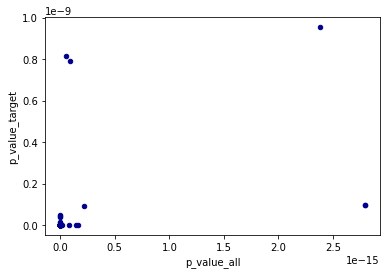

In [158]:
### p-val and term name for the ids
df_target_top_common = df_target_top[df_target_top['term_id']\
                                     .isin(common_termid)][['term_id','term_name','p_value','intersection_size']]\
.set_index('term_id').add_suffix('_target')
df_all_top_common = df_all_top[df_all_top['term_id']\
                               .isin(common_termid)][['term_id','term_name','p_value','intersection_size']]\
.set_index('term_id').add_suffix('_all')

df_combine = pd.concat([df_all_top_common,df_target_top_common],axis = 1)
ax1 = df_combine.plot.scatter(x='p_value_all',y='p_value_target',c='DarkBlue')

I don't get much information from the p-value trend here. Most of them are equally significantly enriched while some shifited their ranking. 

***Next, we send the common terms, target specific terms and All gene specific terms for Revigo analysis to identify the most redundant, general terms in each group***

In [159]:
### Get top100 p-val and terms
df_target_top = df_target.sort_values('p_value').head(100)
df_all_top = df_all.sort_values('p_value').head(100)

In [160]:
### Term intersection - find common terms in top100 lists
common_termid = list(set(df_target_top['term_id']).intersection(df_all_top['term_id']))
common_termname = list(set(df_target_top['term_name']).intersection(df_all_top['term_name']))

In [163]:
len(common_termid) #64 overlapped terms in top100

64

In [161]:
### Specific term name
target_only_term_name = df_target_top[~df_target_top['term_name'].isin(common_termname)]['term_name']
all_only_term_name = df_all_top[~df_all_top['term_name'].isin(common_termname)]['term_name']
target_only_term_id = df_target_top[~df_target_top['term_id'].isin(common_termid)]['term_id']
all_only_term_id = df_all_top[~df_all_top['term_id'].isin(common_termid)]['term_id']

Below are the code for generating term lists as input in the website

In [154]:
for idx in common_termid: #print common id
    print(idx)

GO:0034641
GO:0044267
GO:0006139
GO:0051726
GO:0046483
GO:0033554
GO:0044085
GO:0009058
GO:0071840
GO:0043226
GO:0043232
GO:0043933
GO:0032991
GO:0031974
GO:0044237
GO:0006996
GO:1902494
GO:0043228
GO:0005634
GO:0000166
GO:0005654
GO:0007049
GO:0016043
GO:0006807
GO:0043233
GO:0044249
GO:0016032
GO:0140513
GO:0006464
GO:0008152
GO:0019538
GO:0044260
GO:0000278
GO:0044770
GO:0006725
GO:0043227
GO:0140535
GO:0009893
GO:0010564
GO:0043231
GO:0044238
GO:0043229
GO:0051276
GO:0003824
GO:1990234
GO:0036211
GO:1903047
GO:1901576
GO:0051301
GO:0005829
GO:0005515
GO:0070013
GO:0044772
GO:1901265
GO:1901360
GO:0022607
GO:0005622
GO:0022402
GO:1901987
GO:0031325
GO:0044271
GO:0005737
GO:1901564
GO:0031981


In [155]:
for idx in target_only_term_id: #print target only id
    print(idx)

GO:0071704
GO:1901362
GO:0006793
GO:0006796
GO:0034654
GO:0018130
GO:0080090
GO:0019438
GO:2000142
GO:0019222
GO:0055086
GO:0031323
GO:0060260
GO:0010033
GO:0016740
GO:0009165
GO:0140014
GO:0009719
GO:1901293
GO:0090304
GO:0009628
GO:0043170
GO:0019693
GO:0034645
GO:0009117
GO:0065003
GO:0090407
GO:0046390
GO:0009059
GO:0006352
GO:0006753
GO:0051246
GO:0051171
GO:0006367
GO:0000819
GO:0019637


In [156]:
for idx in all_only_term_id: #print all_only id
    print(idx)

GO:0051641
GO:0008104
GO:0005739
GO:0033036
GO:0005925
GO:0048522
GO:0030055
GO:0070727
GO:0034613
GO:0035639
GO:0098798
GO:0005743
GO:0017076
GO:0032553
GO:0032555
GO:0044265
GO:0005740
GO:0044877
GO:0009057
GO:0045184
GO:0070161
GO:0031975
GO:0031967
GO:0019899
GO:0033043
GO:0046907
GO:0031966
GO:0048518
GO:0051173
GO:0010604
GO:0022411
GO:0043168
GO:0019866
GO:0043412
GO:1901566
GO:0006974


***Let's get a Venn Diagram for the overlapped terms***  
The annotation are the most general clustered GO terms from Revigo result

In [162]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib import gridspec
from matplotlib_venn import venn2, venn2_circles
import numpy as np

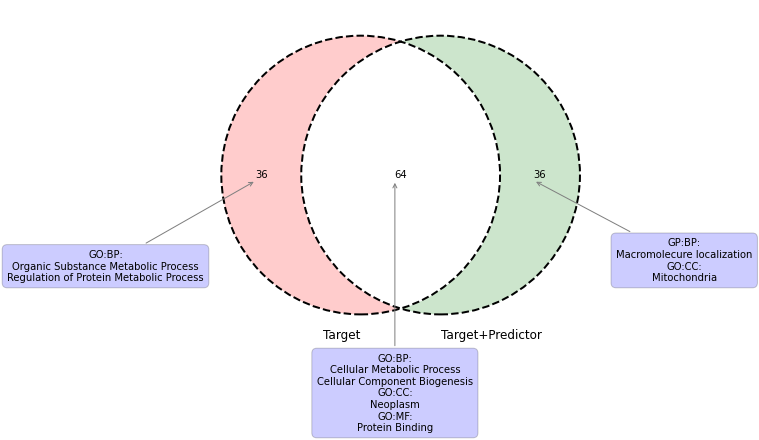

In [201]:
highlight_id = '11'
annotation_common = 'GO:BP:\nCellular Metabolic Process\nCellular Component Biogenesis\nGO:CC:\nNeoplasm\nGO:MF:\nProtein Binding'
annotation_target = 'GO:BP:\nOrganic Substance Metabolic Process\nRegulation of Protein Metabolic Process'
annotation_all = 'GP:BP:\nMacromolecure localization\nGO:CC:\nMitochondria'

fig, axs = plt.subplots(figsize = (10,10))

v = venn2(subsets = (36,36,64) , \
          set_labels = ('Target',  'Target+Predictor'),\
         alpha = 0.2)
v.get_patch_by_id(highlight_id).set_alpha(1.0)
v.get_patch_by_id(highlight_id).set_color('white')
# v.get_label_by_id('111').set_text('PCAWG & CGC')
# Set label position
# for text in v.set_labels:
#     if text.get_text() == 'Target+Predictor':
#         x = text.get_position()[0]
#         y = text.get_position()[1]-0.2
#         text.set_position((x,y))

c = venn2_circles(subsets=(36,36,64), linestyle='dashed')
plt.annotate(annotation_common, xy=v.get_label_by_id(highlight_id).get_position() - np.array([0.02, 0.02]), xytext=(0,-250),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='blue', alpha=0.2),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0',color='grey'))

plt.annotate(annotation_all, xy=v.get_label_by_id('01').get_position() - np.array([0.02, 0.02]), xytext=(150,-100),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='blue', alpha=0.2),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0',color='grey'))

plt.annotate(annotation_target, xy=v.get_label_by_id('10').get_position() - np.array([0.02, 0.02]), xytext=(-150,-100),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='blue', alpha=0.2),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0',color='grey'))

plt.tight_layout()
plt.show()